In [6]:
import pandas as pd
import seaborn as sns
import numpy as np


import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of the plots we will create
# Upload the movies.csv file to your Colab environment first
df=pd.read_csv('/content/movies.csv.zip')

In [7]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))

In [ ]:
# Fill missing values in 'budget' and 'gross' with the median
df['budget'].fillna(df['budget'].median(), inplace=True)
df['gross'].fillna(df['gross'].median(), inplace=True)

# Fill missing values in 'rating' with the mode
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

print("Missing values after imputation:")
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))

In [ ]:
df.dtypes

In [ ]:
df.budget.astype('int64')
df.gross.astype('int64')

In [ ]:
df.dtypes

In [ ]:
df

In [ ]:
df.budget=df.budget.astype('int64')
df.gross=df.gross.astype('int64')

In [ ]:
df

In [ ]:
df.dtypes

In [ ]:
df['yearonly'] = df['released'].astype('str').str[:4]

In [ ]:
df

In [ ]:
# Remove the country in parentheses from the 'released' column
df['released_cleaned'] = df['released'].str.replace(r'\s*\(.*\)', '', regex=True)

# Convert the cleaned 'released' column to datetime objects
df['release_date'] = pd.to_datetime(df['released_cleaned'], format='%B %d, %Y', errors='coerce')

# Extract the year from the datetime objects
df['yearonly'] = df['release_date'].dt.year.astype('Int64')

# Drop the intermediate columns
df = df.drop(columns=['released_cleaned', 'release_date'])

# Display the first few rows to verify
display(df[['released', 'yearonly']].head())

In [26]:
df=df.sort_values(by=['gross'], inplace=False, ascending=False)
display(df)

Output hidden; open in https://colab.research.google.com to view.

In [25]:
pd.options.display.float_format = '{:.2f}'.format
display(df.head())

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.70,5800.00,George Huang,Andy Burg,Will Friedle,United States,15000000.00,309.00,Daybreak,85.00
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.30,5100.00,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000.00,596.00,DENTSU Music And Entertainment,134.00
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.20,735.00,John Swab,John Swab,Ron Perlman,United States,NaN,682.00,Roxwell Films,93.00
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.70,320.00,Shane Stanley,Lee Stanley,Miko Hughes,United States,NaN,790.00,Visual Arts Entertainment,104.00
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.50,5200.00,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,NaN,1400.00,British Broadcasting Corporation (BBC),103.00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
df_sorted = df.sort_values(by=['gross'], inplace=False, ascending=False)
display(df_sorted)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
df_sorted = df.sort_values(by=['gross'], inplace=False, ascending=True)
display(df_sorted)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
pd.set_option('display.max_rows', None)

In [12]:
df['company'].drop_duplicates().sort_values(ascending=False)

,company
7129,thefyzz
5664,micro_scope
6412,iDeal Partners Film Fund
4007,i5 Films
6793,i am OTHER
6420,erbp
3776,double A Films
524,Zupnik-Curtis Enterprises
3330,Zucker Brothers Productions
146,Zoetrope Studios


In [19]:
df

Output hidden; open in https://colab.research.google.com to view.

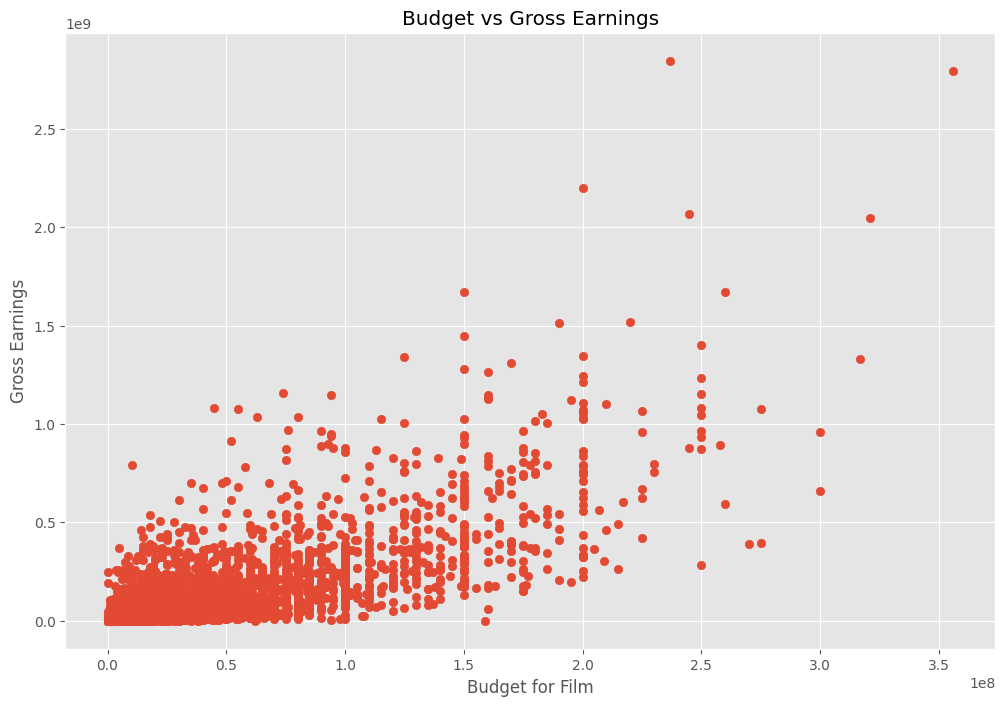

In [28]:
#scatter ploting between budget and gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

In [27]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,1100000.00,James Cameron,James Cameron,Sam Worthington,United States,237000000.00,2847246203.00,Twentieth Century Fox,162.00
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,903000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.00,2797501328.00,Marvel Studios,181.00
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,1100000.00,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.00,2201647264.00,Twentieth Century Fox,194.00
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,876000.00,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.00,2069521700.00,Lucasfilm,138.00
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,897000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.00,2048359754.00,Marvel Studios,149.00


<Axes: xlabel='budget', ylabel='gross'>

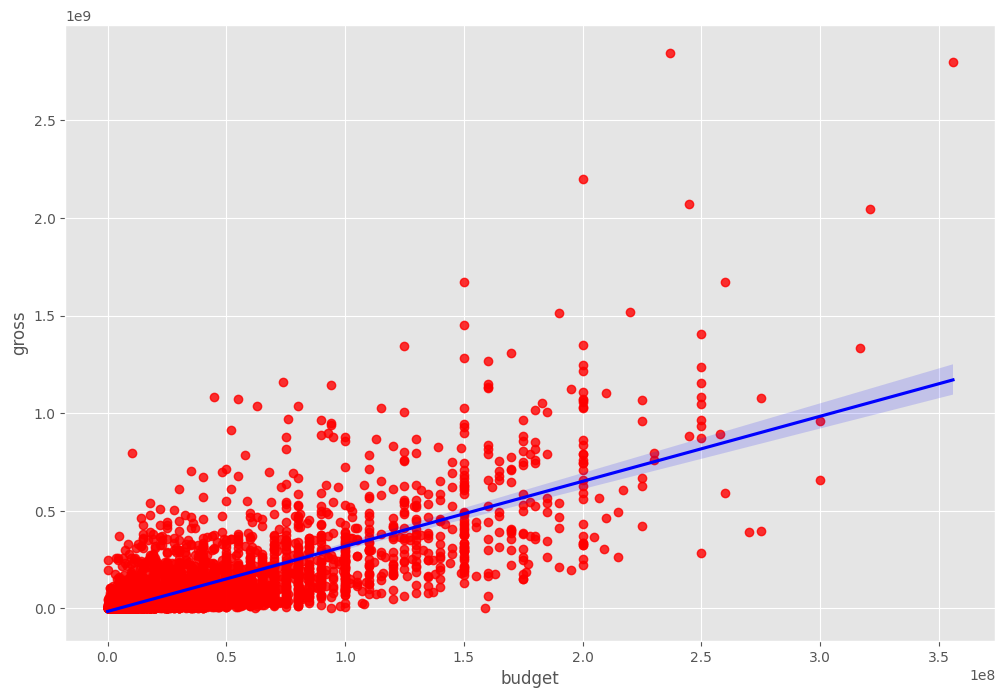

In [33]:
sns.regplot(x='budget', y='gross', data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})


In [40]:
df.corr(numeric_only=True, method='pearson')

,year,score,votes,budget,gross,runtime
year,1.00,0.10,0.22,0.33,0.26,0.12
score,0.10,1.00,0.41,0.08,0.19,0.40
votes,0.22,0.41,1.00,0.44,0.63,0.31
budget,0.33,0.08,0.44,1.00,0.74,0.32
gross,0.26,0.19,0.63,0.74,1.00,0.25
runtime,0.12,0.40,0.31,0.32,0.25,1.00


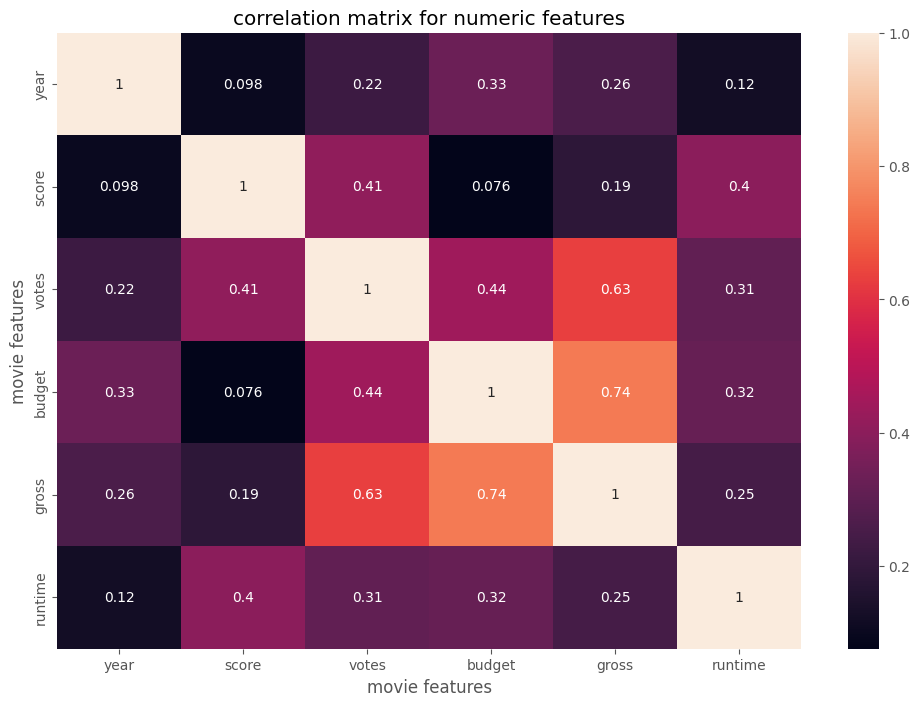

In [45]:
correlation_matrix=df.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("correlation matrix for numeric features")
plt.xlabel("movie features")
plt.ylabel("movie features")

plt.show()

In [46]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,1100000.00,James Cameron,James Cameron,Sam Worthington,United States,237000000.00,2847246203.00,Twentieth Century Fox,162.00
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,903000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.00,2797501328.00,Marvel Studios,181.00
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,1100000.00,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.00,2201647264.00,Twentieth Century Fox,194.00
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,876000.00,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.00,2069521700.00,Lucasfilm,138.00
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,897000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.00,2048359754.00,Marvel Studios,149.00


In [47]:
df_numerized=df
for col_name in df_numerized.columns:
  if (df_numerized[col_name].dtype=='object'):
    df_numerized[col_name]=df_numerized[col_name].astype('category')
    df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized

Output hidden; open in https://colab.research.google.com to view.

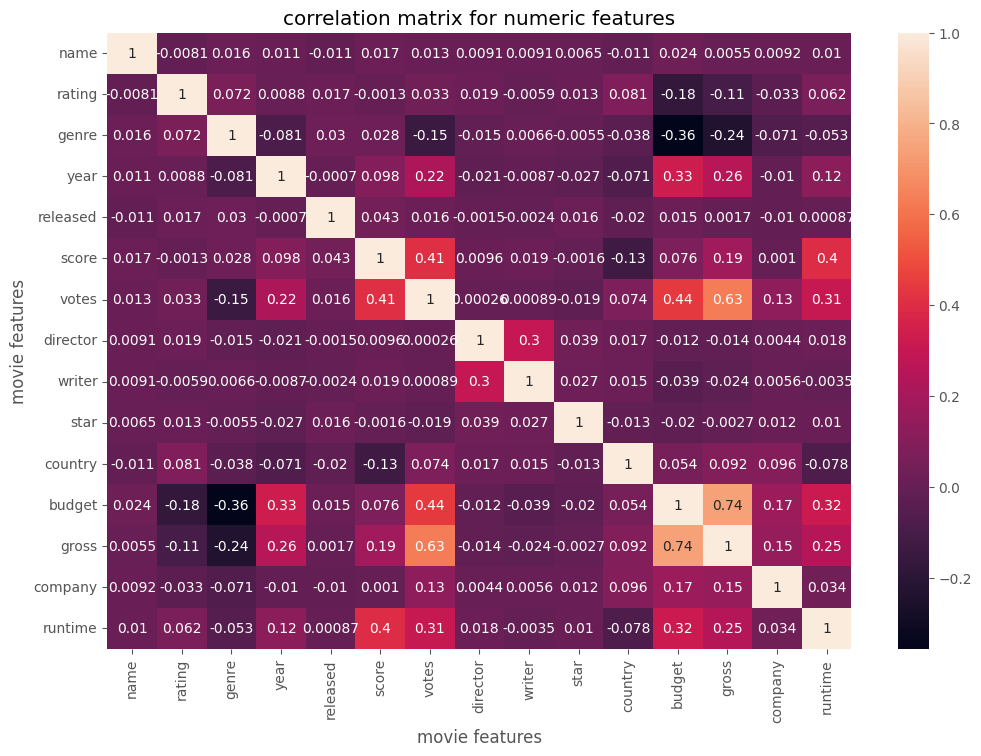

In [48]:
correlation_matrix=df_numerized.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("correlation matrix for numeric features")
plt.xlabel("movie features")
plt.ylabel("movie features")

plt.show()

In [50]:
correlation_matrix=df_numerized.corr()
corr_pairs=correlation_matrix.unstack()
corr_pairs

name      name        1.00
          rating     -0.01
          genre       0.02
          year        0.01
          released   -0.01
          score       0.02
          votes       0.01
          director    0.01
          writer      0.01
          star        0.01
          country    -0.01
          budget      0.02
          gross       0.01
          company     0.01
          runtime     0.01
rating    name       -0.01
          rating      1.00
          genre       0.07
          year        0.01
          released    0.02
          score      -0.00
          votes       0.03
          director    0.02
          writer     -0.01
          star        0.01
          country     0.08
          budget     -0.18
          gross      -0.11
          company    -0.03
          runtime     0.06
genre     name        0.02
          rating      0.07
          genre       1.00
          year       -0.08
          released    0.03
          score       0.03
          votes      -0.15
          director   -0.02
          writer      0.01
          star       -0.01
          country    -0.04
          budget     -0.36
          gross      -0.24
          company    -0.07
          runtime    -0.05
year      name        0.01
          rating      0.01
          genre      -0.08
          year        1.00
          released   -0.00
          score       0.10
          votes       0.22
          director   -0.02
          writer     -0.01
          star       -0.03
          country    -0.07
          budget      0.33
          gross       0.26
          company    -0.01
          runtime     0.12
released  name       -0.01
          rating      0.02
          genre       0.03
          year       -0.00
          released    1.00
          score       0.04
          votes       0.02
          director   -0.00
          writer     -0.00
          star        0.02
          country    -0.02
          budget      0.01
          gross       0.00
          company    -0.01
          runtime     0.00
score     name        0.02
          rating     -0.00
          genre       0.03
          year        0.10
          released    0.04
          score       1.00
          votes       0.41
          director    0.01
          writer      0.02
          star       -0.00
          country    -0.13
          budget      0.08
          gross       0.19
          company     0.00
          runtime     0.40
votes     name        0.01
          rating      0.03
          genre      -0.15
          year        0.22
          released    0.02
          score       0.41
          votes       1.00
          director    0.00
          writer      0.00
          star       -0.02
          country     0.07
          budget      0.44
          gross       0.63
          company     0.13
          runtime     0.31
director  name        0.01
          rating      0.02
          genre      -0.02
          year       -0.02
          released   -0.00
          score       0.01
          votes       0.00
          director    1.00
          writer      0.30
          star        0.04
          country     0.02
          budget     -0.01
          gross      -0.01
          company     0.00
          runtime     0.02
writer    name        0.01
          rating     -0.01
          genre       0.01
          year       -0.01
          released   -0.00
          score       0.02
          votes       0.00
          director    0.30
          writer      1.00
          star        0.03
          country     0.02
          budget     -0.04
          gross      -0.02
          company     0.01
          runtime    -0.00
star      name        0.01
          rating      0.01
          genre      -0.01
          year       -0.03
          released    0.02
          score      -0.00
          votes      -0.02
          director    0.04
          writer      0.03
          star        1.00
          country    -0.01
          budget     -0.02
          gross      -0.00
    

In [53]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

,,0
genre,budget,-0.36
budget,genre,-0.36
gross,genre,-0.24
genre,gross,-0.24
rating,budget,-0.18
budget,rating,-0.18
votes,genre,-0.15
genre,votes,-0.15
country,score,-0.13
score,country,-0.13


In [54]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

,,0
votes,gross,0.63
gross,votes,0.63
budget,gross,0.74
gross,budget,0.74
released,released,1.00
score,score,1.00
rating,rating,1.00
name,name,1.00
genre,genre,1.00
year,year,1.00


votes and budget having high correlation
